In [ ]:
!pip install cartopy
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import xarray as xr
import shapely.geometry as sgeom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 31.5 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Atmos_Chem/ATom_Cleaned_Up/togas2.csv')

In [ ]:
df[df['C2Cl4_TOGA'] == -8888] = np.nan

In [ ]:
# separate out the missions
t1 = df[df.mission == 1]
t2 = df[df.mission == 2]
t3 = df[df.mission == 3]
t4 = df[df.mission == 4]

# remove coordinate columns from buf df to use as data in datasets
t1_buf = t1.drop(['Unnamed: 0',  'UTC_Start', 'UTC_Stop_TOGA', 'UTC_Mean_1s', 'lat', 'lon', 'mission'], axis=1)
t2_buf = t2.drop(['Unnamed: 0', 'UTC_Start', 'UTC_Stop_TOGA', 'UTC_Mean_1s', 'lat', 'lon', 'mission'], axis=1)
t3_buf = t3.drop(['Unnamed: 0', 'UTC_Start', 'UTC_Stop_TOGA', 'UTC_Mean_1s', 'lat', 'lon', 'mission'], axis=1)
t4_buf = t4.drop(['Unnamed: 0','UTC_Start', 'UTC_Stop_TOGA', 'UTC_Mean_1s', 'lat', 'lon', 'mission'], axis=1)

# remove NaNs

# create datasets for each mission
toga1 = xr.Dataset(
    data_vars=dict(
      Altitude=(['loc'], t1.MSL_GPS_Altitude),
      C2Cl4=(['loc'], t1.C2Cl4_TOGA)),
    coords=dict(
        lon=("loc", t1.lon), lat=("loc", t1.lat)))

toga2 = xr.Dataset(
    data_vars=dict(
      Altitude=(['loc'], t2.MSL_GPS_Altitude),
      C2Cl4=(['loc'], t2.C2Cl4_TOGA)),
    coords=dict(
        lon=("loc", t2.lon), lat=("loc", t2.lat)))

toga3 = xr.Dataset(
    data_vars=dict(
      Altitude=(['loc'], t3.MSL_GPS_Altitude),
      C2Cl4=(['loc'], t3.C2Cl4_TOGA)),
    coords=dict(
        lon=("loc", t3.lon), lat=("loc", t3.lat)))

toga4 = xr.Dataset(
    data_vars=dict(
      Altitude=(['loc'], t4.MSL_GPS_Altitude),
      C2Cl4=(['loc'], t4.C2Cl4_TOGA)),
    coords=dict(
        lon=("loc", t4.lon), lat=("loc", t4.lat)))

## Plot flight track by mission

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


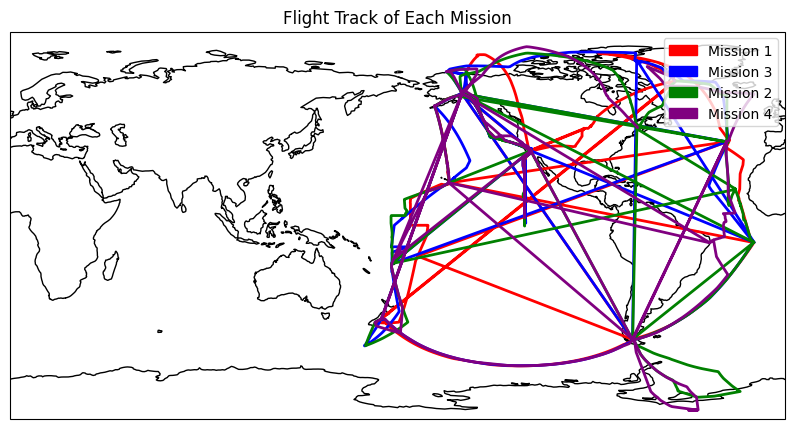

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
ax.coastlines()
track1 = sgeom.LineString(zip(toga1.lon, toga1.lat))
track2 = sgeom.LineString(zip(toga2.lon, toga2.lat))
track3 = sgeom.LineString(zip(toga3.lon, toga3.lat))
track4 = sgeom.LineString(zip(toga4.lon, toga4.lat))
ax.add_geometries([track1],
                  ccrs.PlateCarree(),
                  facecolor='none',
                  edgecolor='red',
                  linewidth=2)
ax.add_geometries([track2],
                  ccrs.PlateCarree(),
                  facecolor='none',
                  edgecolor='blue',
                  linewidth=2)
ax.add_geometries([track3],
                  ccrs.PlateCarree(),
                  facecolor='none',
                  edgecolor='green',
                  linewidth=2)
ax.add_geometries([track4],
                  ccrs.PlateCarree(),
                  facecolor='none',
                  edgecolor='purple',
                  linewidth=2)

# create legend
r = mpatches.Patch(color='red', label='Mission 1')
g = mpatches.Patch(color='green', label='Mission 2')
b = mpatches.Patch(color='blue', label='Mission 3')
p = mpatches.Patch(color='purple', label='Mission 4')
ax.legend(handles=[r, b, g, p])
ax.set_title('Flight Track of Each Mission');

### Altitude of Missions

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10), subplot_kw=dict(projection=ccrs.PlateCarree(180)))
ax[0,0].coastlines()
sc = ax[0,0].scatter(toga1.lon, toga1.lat, c=toga1.Altitude, transform=ccrs.PlateCarree())
ax[0,0].set_title('Mission 1: Jul-Aug 2016', size=15)

ax[0,1].coastlines()
sc1 = ax[0,1].scatter(toga2.lon, toga2.lat, c=toga2.Altitude, transform=ccrs.PlateCarree())
ax[0,1].set_title('Mission 2: Jan-Feb 2017', size=15)

ax[1,0].coastlines()
sc2 = ax[1,0].scatter(toga3.lon, toga3.lat, c=toga3.Altitude, transform=ccrs.PlateCarree())
ax[1,0].set_title('Mission 3: Sep-Oct 2017', size=15)

ax[1,1].set_title('Mission 4: Apr-May 2018', size=15)
ax[1,1].coastlines()
sc3 = ax[1,1].scatter(toga4.lon, toga4.lat, c=toga4.Altitude, transform=ccrs.PlateCarree())

ax5 = fig.add_axes([12, 10, 2, 10])
cbar3 = plt.colorbar(sc3, ax=ax5, orientation='vertical')
cbar3.ax5.tick_params(labelsize=12)
cbar3.set_label('Altitude (m)', size=16)

Output hidden; open in https://colab.research.google.com to view.

### Gridded distributions at various height bins

In [ ]:
low = toga1.where(toga1.Altitude < 2000).dropna(dim='loc')
mid = toga1.where((toga1.Altitude >= 2000) & (toga1.Altitude < 8000)).dropna(dim='loc')
high = toga1.where(toga1.Altitude >= 12000).dropna(dim='loc')

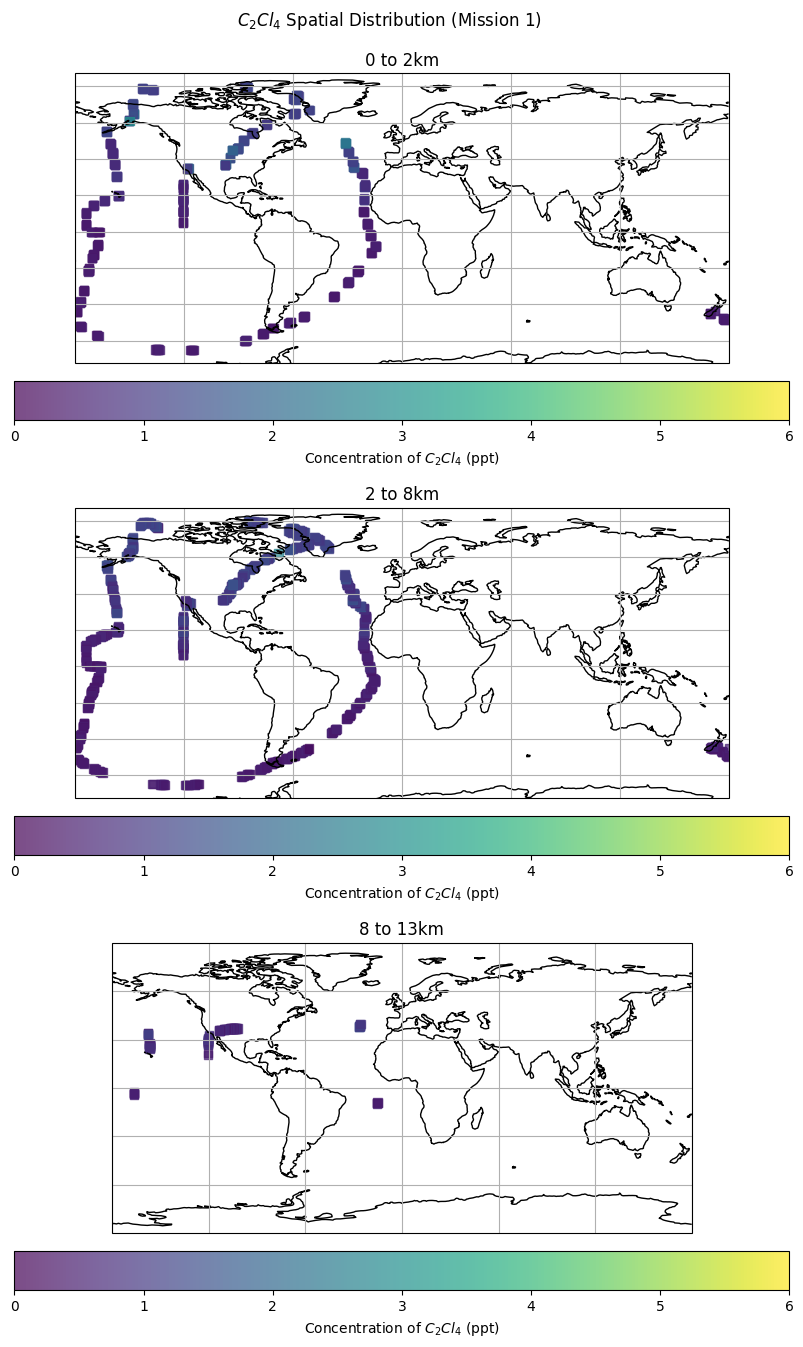

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 16), subplot_kw=dict(projection=ccrs.PlateCarree()))

# 0-2km
ax[0].coastlines()
ax[0].gridlines()
sc = ax[0].scatter(low.lon, low.lat, c=low.C2Cl4, marker='s', alpha=0.7,
                   transform=ccrs.PlateCarree(), vmin=0, vmax=6)
cbar = plt.colorbar(sc, ax=ax[0], orientation='horizontal', pad=0.05)
cbar.set_label('Concentration of $C_2Cl_4$ (ppt)')
ax[0].set_title('0 to 2km')

# 2-8km
ax[1].coastlines()
ax[1].gridlines()
sc = ax[1].scatter(mid.lon, mid.lat, c=mid.C2Cl4, marker='s', alpha=0.7,
                   transform=ccrs.PlateCarree(), vmin=0, vmax=6)
cbar = plt.colorbar(sc, ax=ax[1], orientation='horizontal', pad=0.05)
cbar.set_label('Concentration of $C_2Cl_4$ (ppt)')
ax[1].set_title('2 to 8km')

# 8+km
ax[2].coastlines()
ax[2].gridlines()
sc = ax[2].scatter(high.lon, high.lat, c=high.C2Cl4, marker='s', alpha=0.7,
                   transform=ccrs.PlateCarree(), vmin=0, vmax=6)
cbar = plt.colorbar(sc, ax=ax[2], orientation='horizontal', pad=0.05)
cbar.set_label('Concentration of $C_2Cl_4$ (ppt)')
ax[2].set_title('8 to 13km');
ax[2].set_extent([-180, 180, -90, 90])

plt.suptitle('$C_2Cl_4$ Spatial Distribution (Mission 1)', y=0.92);